<a href="https://colab.research.google.com/github/TonioHathos/AI_Valeo/blob/main/Preprocessing_dataset_antoine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Missing values

## Récupération datasets

In [2]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
import numpy as np

!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.0 MB/s eta 0:00:00


In [3]:
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/trainingoutput.csv
     

--2023-05-15 12:13:04--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795776 (777K) [text/plain]
Saving to: ‘testinputs.csv’

testinputs.csv      100%[===================>] 777.12K  --.-KB/s    in 0.05s   

2023-05-15 12:13:05 (15.4 MB/s) - ‘testinputs.csv’ saved [795776/795776]

--2023-05-15 12:13:05--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3432084 (3.3M) [text/

In [4]:


df_test_inputs = pd.read_csv('testinputs.csv')
df_training_inputs = pd.read_csv('traininginputs.csv')
df_training_output = pd.read_csv('trainingoutput.csv')
     


# On détermine les colonnes qui ont des données manquantes


In [5]:
df_test_inputs.columns[df_test_inputs.isnull().any()].tolist()


['OP100_Capuchon_insertion_mesure']

In [6]:
df_training_inputs.columns[df_training_inputs.isnull().any()].tolist()

['OP100_Capuchon_insertion_mesure']

In [7]:
df_training_output.columns[df_training_output.isnull().any()].tolist()

[]

In [36]:
df_training_inputs.shape

(34515, 14)

In [ ]:

print("NaN of OP100_Capuchon_insertion_mesure in training = ", df_training_inputs['OP100_Capuchon_insertion_mesure'].isna().sum() )
print("NaN of OP100_Capuchon_insertion_mesure in test = ", df_test_inputs['OP100_Capuchon_insertion_mesure'].isna().sum() )

NaN of OP100_Capuchon_insertion_mesure in training =  18627
NaN of OP100_Capuchon_insertion_mesure in test =  4360


## On relie le dataset des données d'entrainement avec le label en sortie

In [26]:
df_training = pd.merge(df_training_inputs, df_training_output, on='PROC_TRACEINFO')

In [34]:
df_training = df_training.drop(columns=["PROC_TRACEINFO"])

KeyError: ignored

<Axes: >

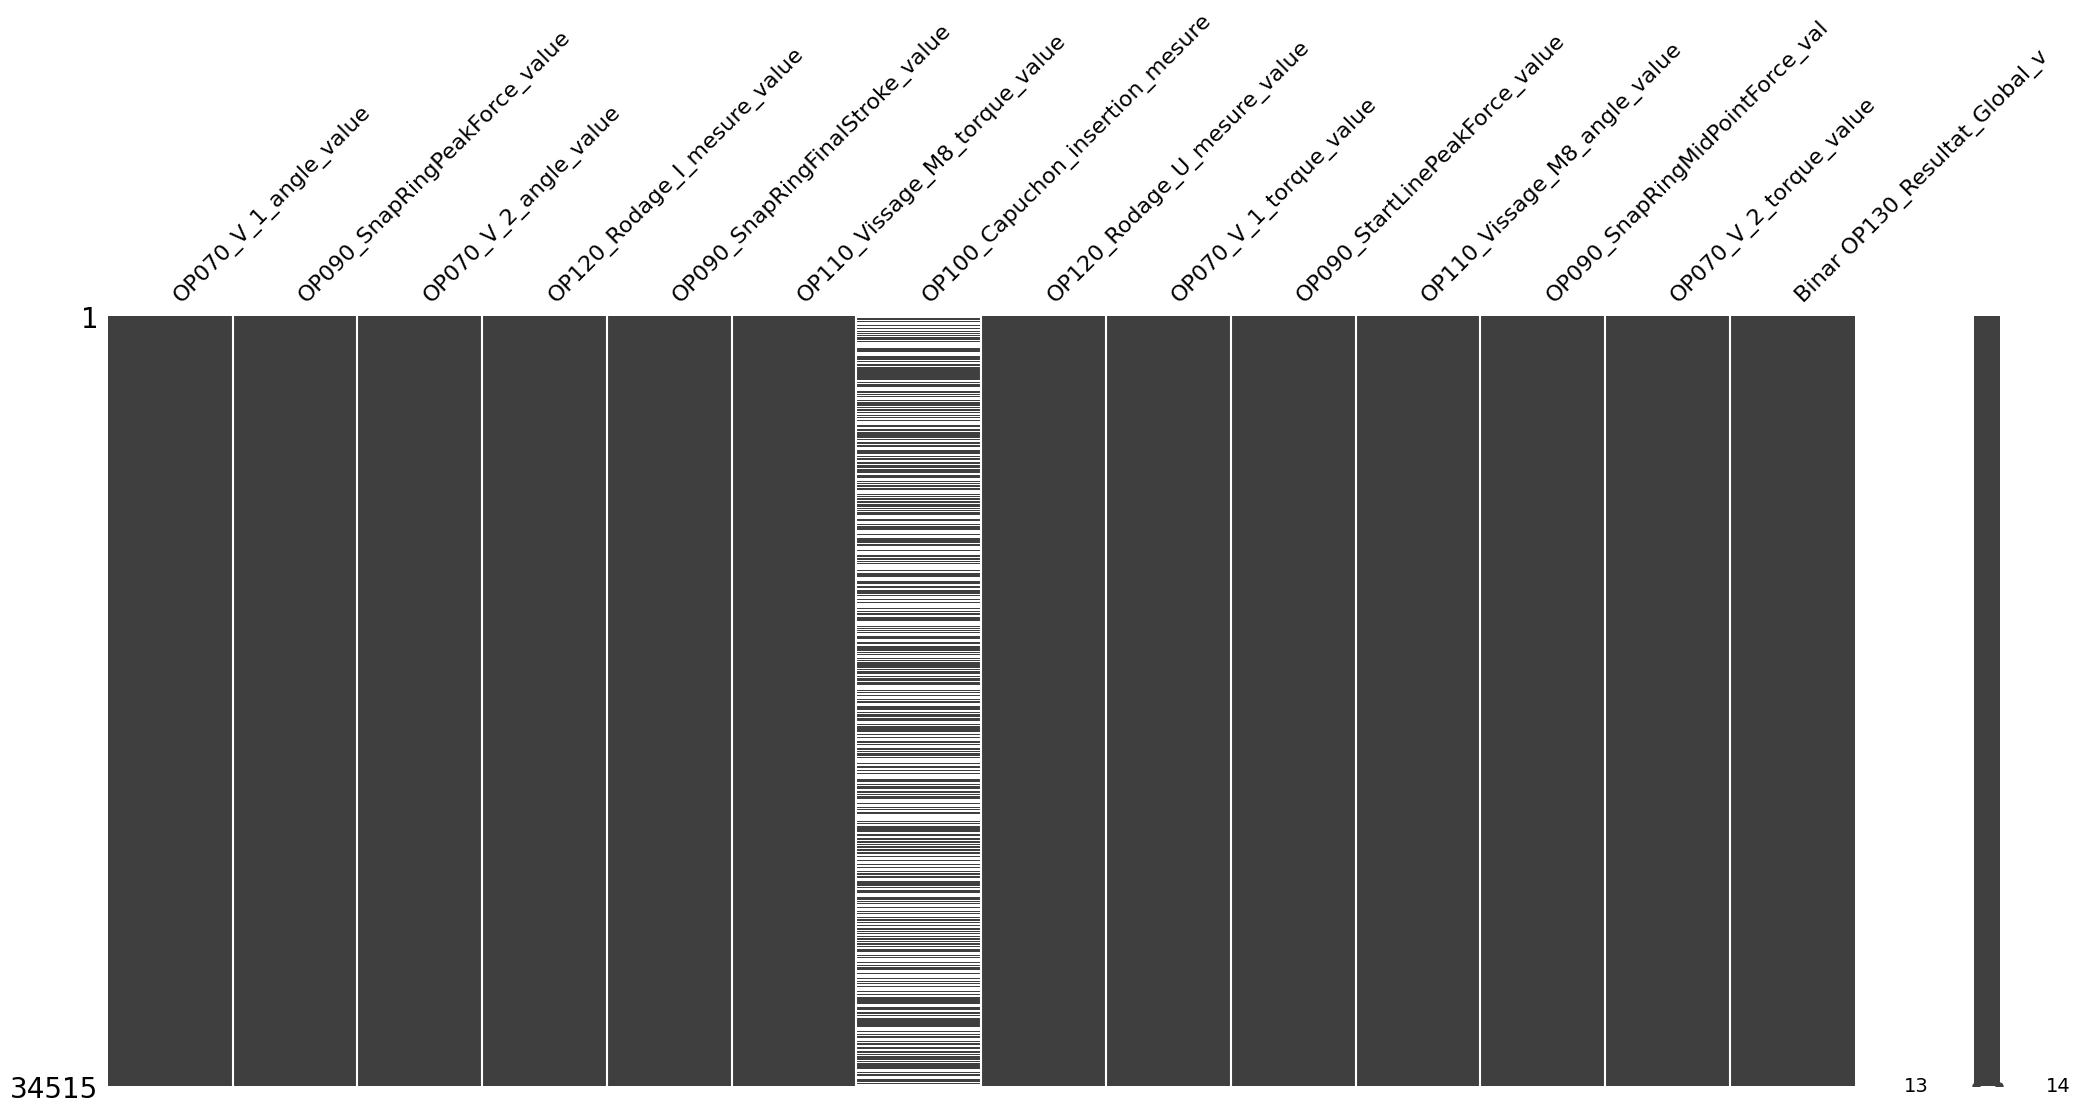

In [33]:
msno.matrix(df_training)

<Axes: >

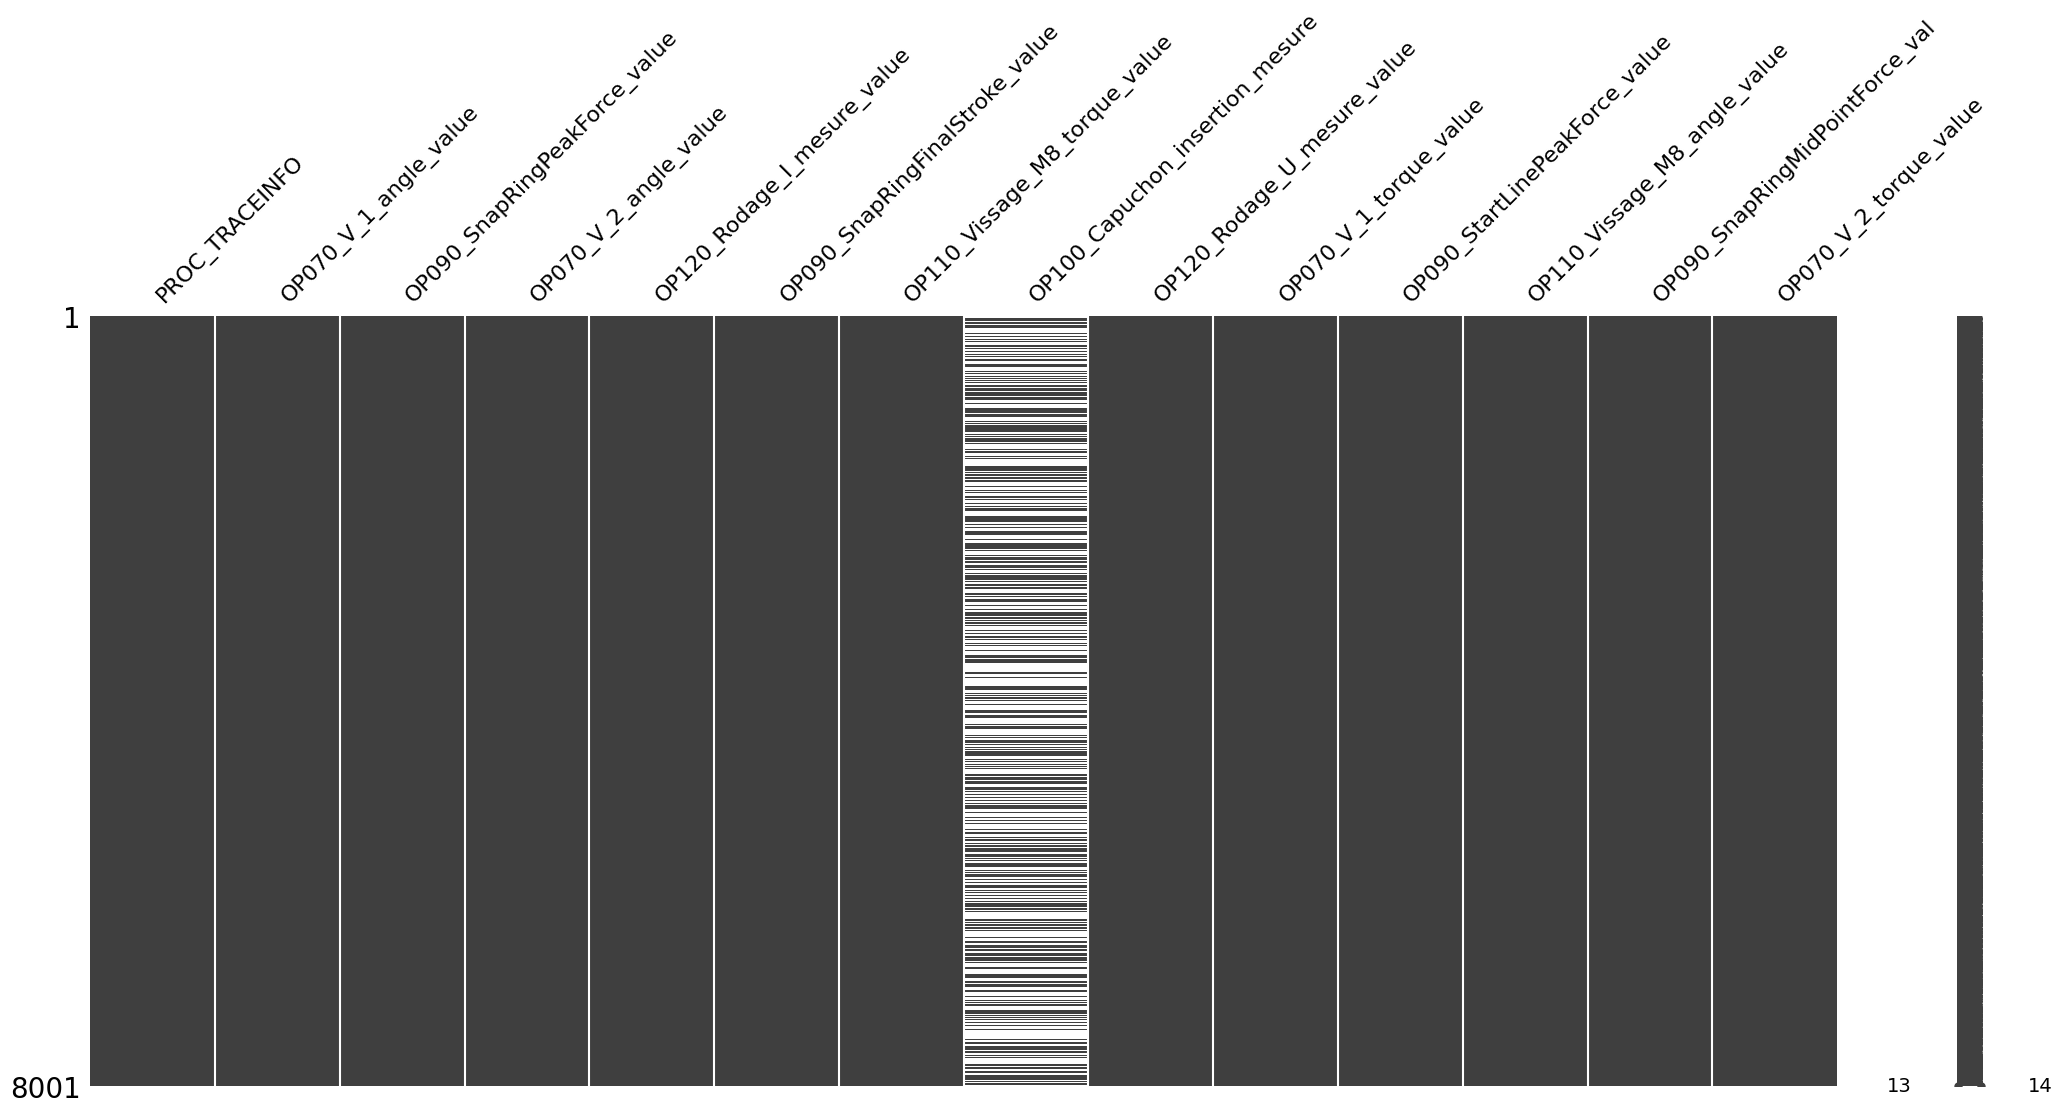

In [13]:
msno.matrix(df_test_inputs)

### Stratégie 1: Supprimer l'unique colonne avec des valeurs manquantes

In [38]:
df_training_cleaned = df_training.drop(columns=["OP100_Capuchon_insertion_mesure"])
df_test_inputs_cleaned = df_test_inputs.drop(columns=["OP100_Capuchon_insertion_mesure", "PROC_TRACEINFO"])

### Stratégie 2: Supprimer les lignes avec des valeurs manquantes

In [39]:
df_training_nonull = df_training.dropna()

#Categorical features

In [23]:
df_training_inputs_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            34515 non-null  float64
 1   OP090_SnapRingPeakForce_value    34515 non-null  float64
 2   OP070_V_2_angle_value            34515 non-null  float64
 3   OP120_Rodage_I_mesure_value      34515 non-null  float64
 4   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 5   OP110_Vissage_M8_torque_value    34515 non-null  float64
 6   OP120_Rodage_U_mesure_value      34515 non-null  float64
 7   OP070_V_1_torque_value           34515 non-null  float64
 8   OP090_StartLinePeakForce_value   34515 non-null  float64
 9   OP110_Vissage_M8_angle_value     34515 non-null  float64
 10  OP090_SnapRingMidPointForce_val  34515 non-null  float64
 11  OP070_V_2_torque_value           34515 non-null  float64
dtypes: float64(12)
mem

In [24]:
df_training_inputs_cleaned.to_csv()

',OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value\n0,180.4,190.51,173.1,113.64,12.04,12.16,11.97,6.62,26.37,18.8,109.62,6.6\n1,138.7,147.7,163.5,109.77,12.12,12.19,11.97,6.41,21.03,18.5,105.48,6.4\n2,180.9,150.87,181.2,109.79,11.86,12.24,11.97,6.62,25.81,17.5,100.03,6.61\n3,173.5,159.56,151.8,113.25,11.82,12.35,11.97,6.62,24.62,15.6,104.94,6.61\n4,174.5,172.29,177.5,112.88,12.07,12.19,11.97,6.62,29.22,33.6,99.19,6.61\n5,158.7,165.79,178.4,112.09,11.88,12.15,11.97,6.62,25.99,22.3,97.13,6.63\n6,158.8,153.91,152.5,111.25,12.11,12.19,11.97,6.41,18.79,17.7,81.56,6.4\n7,181.0,164.02,175.8,117.5,11.75,12.14,11.97,6.61,24.33,36.0,95.12,6.62\n8,156.1,159.5,151.8,111.75,12.09,12.21,11.97,6.61,26.07,16.6,101.57,6.61\n9,

In [25]:
df_training_inputs_cleaned.describe()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
count,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000
mean,159.906922,156.915055,159.618236,113.350222,11.970190,12.256785,11.971027,6.548403,23.630152,17.878398,97.700978,6.550867
std,15.662650,11.271492,15.091490,3.528522,0.169873,0.065319,0.003050,0.097602,2.546341,6.785079,6.837714,0.094814
min,101.800000,0.000000,82.000000,99.990000,0.000000,12.030000,11.970000,5.670000,0.000000,6.300000,0.000000,5.740000
25%,148.700000,149.210000,149.400000,111.040000,11.850000,12.210000,11.970000,6.410000,22.280000,13.500000,94.310000,6.420000
50%,158.000000,156.180000,158.700000,113.160000,12.040000,12.260000,11.970000,6.610000,23.880000,16.400000,98.500000,6.610000
75%,169.300000,164.380000,168.900000,115.380000,12.080000,12.300000,11.970000,6.620000,25.290000,20.200000,102.230000,6.610000
max,198.300000,196.920000,198.100000,177.950000,12.190000,12.500000,11.990000,6.670000,43.410000,84.600000,127.300000,6.670000
